In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
np.random.seed(42)
path = Path('../data/imgs')

In [4]:
bs = 64
data = ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=bs, num_workers=4).normalize(imagenet_stats)

In [5]:
learn = cnn_learner(data, models.resnet152, metrics=[accuracy, FBeta(average='macro')])

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/jupyter/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [6]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.478565,0.173376,0.950937,0.946051,04:51
1,0.180719,0.061790,0.980821,0.979471,03:12
2,0.094769,0.039214,0.986842,0.986175,03:12


In [7]:
learn.save('resnet152-stage-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


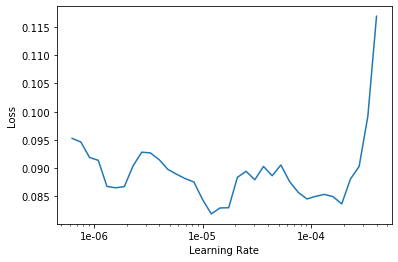

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(3, max_lr=slice(3e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.081589,0.024833,0.992864,0.992416,04:10
1,0.035655,0.018405,0.995986,0.995797,04:10
2,0.023520,0.014287,0.996209,0.995990,04:10


In [12]:
learn.save('resnet152-stage-2')

In [13]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


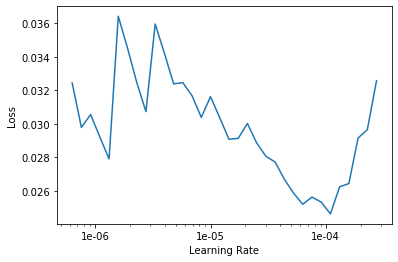

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 5e-4))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.108794,0.048847,0.987288,0.987131,04:11
1,0.027706,0.011450,0.996878,0.996752,04:11


In [16]:
learn.save('resnet152-stage-3')

In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


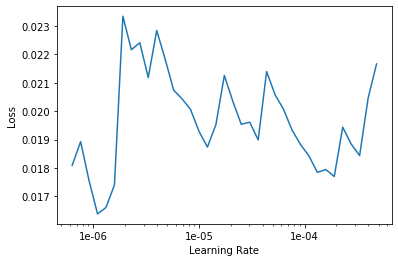

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(3, max_lr=slice(2e-7, 7e-6))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.015414,0.010004,0.997101,0.997023,04:11
1,0.015641,0.009637,0.997547,0.997479,04:10
2,0.011037,0.008969,0.997770,0.997750,04:10


epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


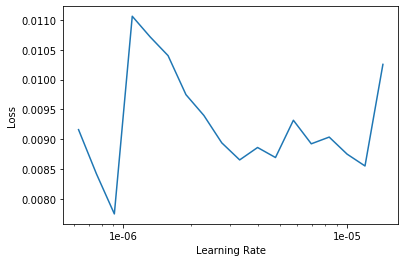

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(3, max_lr=slice(1e-7, 5e-6))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.011447,0.009330,0.997770,0.997688,04:11
1,0.009343,0.008526,0.997993,0.997986,04:11
2,0.010838,0.008524,0.997993,0.997959,04:11


In [22]:
learn.export()